<a href="https://colab.research.google.com/github/Hesham-14/Neural-Network-Projects/blob/main/IMDB_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dense, Dropout
from keras.layers import Flatten
from keras.layers import GlobalMaxPool1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [2]:
movie_reviews = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
movie_reviews.isnull().values.any()
movie_reviews.shape

(50000, 2)

In [3]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
movie_reviews["review"][4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

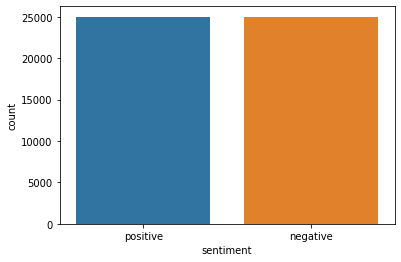

In [5]:
import seaborn as s

s.countplot(x='sentiment', data=movie_reviews)

In [6]:
# Removing numeric and empty texts

TEG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
  return TEG_RE.sub('', text)

def preprocess_text(sen):
  # Removing html tags
  sentence = remove_tags(sen)

  # Removing punctuations and numbers
  sentence = re.sub('[^a-zA-Z]', ' ', sentence)

  # Single character removal
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

  # removing multiple spaces
  sentences = re.sub(r'\s+', ' ', sentence)

  return sentence


def remove_tages(text):
  return TEG_RE.sub('', text)

review = []
sentences = list(movie_reviews['review'])
for sen in sentences:
  review.append(preprocess_text(sen))


In [7]:
review[4]

'Petter Mattei Love in the Time of Money  is visually stunning film to watch  Mr  Mattei offers us vivid portrait about human relations  This is movie that seems to be telling us what money  power and success do to people in the different situations we encounter  This being variation on the Arthur Schnitzler play about the same theme  the director transfers the action to the present time New York where all these different characters meet and connect  Each one is connected in one way  or another to the next person  but no one seems to know the previous point of contact  Stylishly  the film has sophisticated luxurious look  We are taken to see how these people live and the world they live in their own habitat The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits big city is not exactly the best place in which human relations find sincere fulfillment  as one discerns is the case with most of the people we encounter The acting

In [8]:
# Convert labels into integers

converted = movie_reviews['sentiment']

converted = np.array(list(map(lambda x: 1 if x=="positive" else 0, converted)))

In [9]:
# Split training and testing data
review_train, review_test, converted_train, converted_test = train_test_split(review, converted, test_size= 0.20, random_state=42)

In [12]:
# Tokenizing sentences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review_train)

review_train = tokenizer.texts_to_sequences(review_train)
review_test = tokenizer.texts_to_sequences(review_test)

In [16]:
# Pad sequences class // setting the max size of each list to 100, by adding zeros if less or removing if more.
vocab_size = len(tokenizer.word_index)+1

max_length = 100

review_train = pad_sequences(review_train, padding='post', maxlen=max_length)
review_test = pad_sequences(review_test, padding='post', maxlen=max_length)

In [ ]:
# uploading kaggle dataset

!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [24]:
!kaggle datasets download danielwillgeorge/glove6b100dtxt

glove6b100dtxt.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/glove6b100dtxt.zipy

In [28]:
# GloVe embedding
from numpy import array
from numpy import asarray
from numpy import zeros

embedding_dictionary = dict()
glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:], dtype='float32')
  embedding_dictionary [word] = vector_dimensions
glove_file.close()

In [29]:
# Creating Embedding Matrix
embedding_matrix= zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector= embedding_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

In [31]:
# Creating model
from keras.layers import LSTM

model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length, trainable= False)
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics= ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          9254700   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 9,372,077
Trainable params: 117,377
Non-trainable params: 9,254,700
_________________________________________________________________


In [33]:
history = model.fit(review_train, converted_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(review_test, converted_test, verbose=1)

Epoch 1/6
250/250 [==============================] - 8s 33ms/step - loss: 0.5536 - acc: 0.7143 - val_loss: 0.4561 - val_acc: 0.7909
Epoch 2/6
250/250 [==============================] - 7s 27ms/step - loss: 0.4358 - acc: 0.7982 - val_loss: 0.4111 - val_acc: 0.8119
Epoch 3/6
250/250 [==============================] - 7s 28ms/step - loss: 0.3903 - acc: 0.8224 - val_loss: 0.3700 - val_acc: 0.8328
Epoch 4/6
250/250 [==============================] - 7s 27ms/step - loss: 0.3676 - acc: 0.8361 - val_loss: 0.3706 - val_acc: 0.8346
Epoch 5/6
250/250 [==============================] - 7s 27ms/step - loss: 0.3455 - acc: 0.8500 - val_loss: 0.3643 - val_acc: 0.8428
Epoch 6/6
313/313 [==============================] - 3s 10ms/step - loss: 0.3381 - acc: 0.8519


In [34]:
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Test Score:  0.33814552426338196
Test Accuracy:  0.8518999814987183


In [46]:
# making Predictions
instance = review[60]
print(instance)

instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
  for item in sublist:
    flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen= max_length)

model.predict(instance)

What happened  What we have here is basically solid and plausible premise and with decent and talented cast  but somewhere the movie loses it  Actually  it never really got going  There was little excitement when we find out that Angie is not really pregnant  then find out that she is after all  but that was it  Steve Martin  who is very talented person and usually brings lot to movie  was dreadful and his entire character was not even close to being important to this movie  other than to make it longer really would have liked to see more interactions between the main characters  Kate and Angie  and maybe try not for pure comedy  which unfortunately it was not  but maybe drama with comedic elements think if the movie did this it could have been very funny since both actresses are quite funny in their own ways and sitting here can think of numerous scenarios that would have been riot 


array([[0.9413576]], dtype=float32)

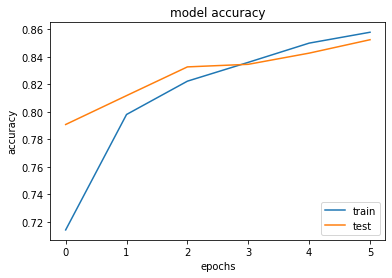

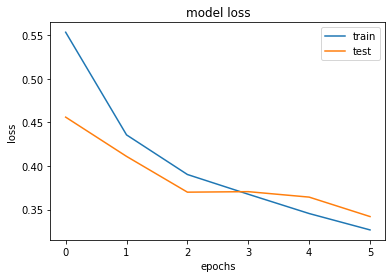

In [54]:
# plotting 
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()